## Alice spring: 2016, 2017, 2018 

In [44]:
#! pip install SALIb

In [45]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np


In [46]:
### running SAlib example:

In [47]:
from IPython.display import HTML, display
from sympy import diff, init_printing
import argparse
import csv
init_printing() 
init_printing(use_latex='mathjax')  # This causes mathjax to render all output
from sympy.printing import StrPrinter
StrPrinter._print_Quantity = lambda self, expr: str(expr.abbrev)    # displays short units (m instead of meter

In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

!pip install statsmodels

In [49]:
from sys import stdout       # For printing progress of computations
import numpy as np
import pandas as pd
import scipy as sc
import glob
import statsmodels.api as sm
from io import StringIO
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *
from sklearn import metrics
import calendar
from sympy.printing.theanocode import theano_function

In [50]:
import numpy as np
from netCDF4 import Dataset
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sys
from itertools import chain



In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [52]:
import xarray as xr
from sympy.physics.units import convert_to
#import matplotlib
#from matplotlib import rc
import numpy as np
from pandas import Timestamp
from essm import Eq, e
from essm.equations import Equation
from essm.variables import Variable
from essm.variables.utils import generate_metadata_table
from essm.variables.units import derive_unit, derive_baseunit, markdown, SI
from essm.variables.units import joule, kelvin, kilogram, meter, pascal, second, watt

from sympy import diff, Eq, exp, init_printing, log, solve, sqrt 

In [53]:
import glob
from netCDF4 import Dataset
import os

filelist = ['arr[0]', 'arr[1]', 'arr[2]']
ncfile = xr.open_mfdataset(filelist)

In [54]:
!ls /home/gitanjalithakur/Documents/Aerodynamic_conductance/essm/aerodynamic_conductances/jupyter/LST_epsilon/data/T

ls: cannot access '/home/gitanjalithakur/Documents/Aerodynamic_conductance/essm/aerodynamic_conductances/jupyter/LST_epsilon/data/T': No such file or directory


In [55]:
path = '/home/thakur_21505/Documents/git_projects/aerodynamic_conductances/jupyter/leonardo_conference/data/AS' 
#print(path)
    
ncfile = xr.open_mfdataset(path +'/*.nc') #, concat_dim= 'ensemble')


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray v

In [56]:
HWframe= ncfile.to_dataframe()


In [57]:
HWframe.index=HWframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'

In [58]:
HWframe.reset_index(inplace=True)
HWframe.index=HWframe.time

HWframerang = pd.date_range('1/1/2016 00:00:00', periods=len(HWframe.index), freq='30min')
HWframe.index = HWframerang
HWframe

In [59]:
plt_path= '/home/thakur_21505/lst-retrival-from-fluxnet-data/latex/plots_lstpaper/'

### prec:

In [60]:
df_prec=HWframe[['Precip']]
df_prec1=df_prec.resample('D').sum()
#df_prec1

### data in pandas series

In [61]:
airtemp = HWframe['Ta']


In [62]:
HWframe=HWframe.replace(-9999.000000, np.nan)

## combining series:
HWframe=pd.concat([SH2, lup2, lud2, TA2, Rn2, WS2], axis=1)
HWframe.head()
HWframe=HWframe.replace(-9999.000000, np.nan)
HWframe.fh



### Longwave balance:

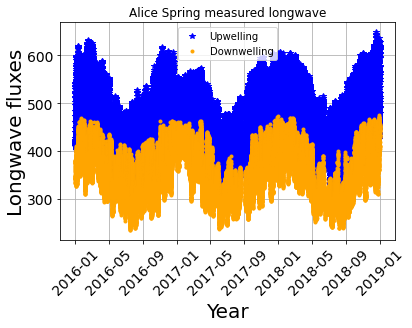

In [63]:
df=HWframe.copy()
plt.plot(df.index,df.Flu,"*",color= 'blue')
plt.plot(df.index,df.Fld, ".",color= 'orange')
plt.xticks(rotation=45)
plt.xlabel('Year', ha='center',fontsize=20)
plt.ylabel('Longwave fluxes', labelpad=10, va='center',fontsize=20)
plt.legend(['Upwelling','Downwelling'])
plottitle = 'Alice Spring measured longwave'
fname = 'Alice spring longw'
plt.title(plottitle)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
####

## SEB correction

In [64]:
Beta = (HWframe.Fh)/(HWframe.Fe)
HWframe["beta"] = Beta

dLE=(HWframe.Fn - HWframe.Fg - (1+ HWframe.beta)*HWframe.Fe)/(1+ HWframe.beta)
HWframe["dLE"] = dLE
HWframe["Fe_corr"] = HWframe.dLE + HWframe.Fe
HWframe["dH"] = (HWframe.dLE + HWframe.Fe)* Beta - HWframe.Fh
HWframe["Fh_corr"] = HWframe.Fh + HWframe.dH

#dH=

## variables :

In [65]:
class epsilon (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon'
    #default = 0.9
class eps_r (Variable):
    """emissivity from """ 
    unit = 1 
    latex_name ='\epsilon_{r}'
    #default = 0.9
class eps_b (Variable):
    """emissivity from """ 
    unit = 1 
    latex_name ='\epsilon_{b}'
    #default = 0.9
        
    
    
class sigma (Variable):
    """ stefan-boltzmann constant""" 
    unit =  watt/(meter**2 * kelvin**4)
    latex_name ='\sigma'
    default = 5.67 * 10**-8


class T_s(Variable): 
    """Effective surface temperature.""" 
    unit = kelvin 
    latex_name ='T_{s}'
       
    
class T_a(Variable): 
    """Air temperature""" 
    unit = kelvin 
    latex_name ='T_a'   
 
    
class R_lout(Variable): 
    """upwelling longwave""" 
    unit = watt/meter**2
    latex_name ='R_{l,out}'
    #default = Hs.longwave_up
    
    
class H(Variable): 
    """sensible heat""" 
    unit = watt/meter**2
    latex_name ='H'
    
class delta_T(Variable): 
    """difference in surface and air temperature""" 
    unit = kelvin 
    latex_name ='\Delta T'

    

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/variables/_core.py:89: UserWarning: "__main__:epsilon" will be overridden by "__main__:<class '__main__.epsilon'>"
  instance[expr] = instance
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/variables/_core.py:89: UserWarning: "__main__:eps_r" will be overridden by "__main__:<class '__main__.eps_r'>"
  instance[expr] = instance
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/variables/_core.py:89: UserWarning: "__main__:eps_b" will be overridden by "__main__:<class '__main__.eps_b'>"
  instance[expr] = instance
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/variables/_core.py:89: UserWarning: "__main__:sigma" will be overridden by "__main__:<class '__main__.sigma'>"
  instance[expr] = instance
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/variables/_core.py:89: UserWarning: "__main__:T_s" will be overridden by "__main__:<class '__ma

In [66]:
# calculation of Ts considering both eitted and reflected radiation(Mike)
class R_lin(Variable):
    """Incoming Longwave radiation"""
    latex_name = r'R_{l,in}'
    unit = watt/meter**2
class eq_Rlout_Rlin(Equation):
    """Upwelling longwave radiation including reflected."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4 + (1-epsilon) * R_lin)
eq_Rlout_Rlin

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/variables/_core.py:89: UserWarning: "__main__:R_lin" will be overridden by "__main__:<class '__main__.R_lin'>"
  instance[expr] = instance
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/equations/_core.py:107: UserWarning: "__main__:eq_Rlout_Rlin" will be overridden by "__main__:<class '__main__.eq_Rlout_Rlin'>"
  instance[expr] = instance


                         4    
Rₗₒᵤₜ = Rₗᵢₙ⋅(1 - ε) + Tₛ ⋅ε⋅σ

In [67]:
class eq_Ts_Rlout_Rlin(eq_Rlout_Rlin.definition):
    """Surface temperature as a function of LWout and LWin"""
    soln = solve(eq_Rlout_Rlin, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout_Rlin

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/equations/_core.py:107: UserWarning: "__main__:eq_Ts_Rlout_Rlin" will be overridden by "__main__:<class '__main__.eq_Ts_Rlout_Rlin'>"
  instance[expr] = instance


         _____________________
        ╱ Rₗᵢₙ   Rₗᵢₙ   Rₗₒᵤₜ 
Tₛ = 4 ╱  ──── - ──── + ───── 
     ╲╱    σ     ε⋅σ     ε⋅σ  

In [68]:
HWframe["T_a"] = pd.Series(HWframe.Ta + 273.15, index=HWframe.index)

tf_Ts = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
list_Ts = tf_Ts(HWframe.Flu,HWframe.Fld)
print(list_Ts)


## surface temperature calculation: ignoring reflected / SBlaw

In [69]:
class eq_Rlout(Equation):
    """Upwelling longwave radiation."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4)
eq_Rlout


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/equations/_core.py:107: UserWarning: "__main__:eq_Rlout" will be overridden by "__main__:<class '__main__.eq_Rlout'>"
  instance[expr] = instance


          4    
Rₗₒᵤₜ = Tₛ ⋅ε⋅σ

In [70]:
class eq_Ts_Rlout(eq_Rlout.definition):
    """Surface temperature as a function of LWout"""
    soln = solve(eq_Rlout, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/equations/_core.py:107: UserWarning: "__main__:eq_Ts_Rlout" will be overridden by "__main__:<class '__main__.eq_Ts_Rlout'>"
  instance[expr] = instance


         _______
        ╱ Rₗₒᵤₜ 
Tₛ = 4 ╱  ───── 
     ╲╱    ε⋅σ  

## plots:

In [71]:
def Ts_boxplt_modeps (df_all,year):    #days,hours):
    """Plot a panel per month with H and delT."""
    #df_all = Asframe.copy()
    con_month=[]
    ign_month=[]
    for i in range(12):
        list_months = list(range(1,13))
        df = df_all[(df_all.index.year == year) & (df_all.index.month == list_months[i]) &  (df_all.Fn > 25) & (df_all.Ws > 2) ]  
                    #& (df_all.NETRAD > 25) & (df_all.WS > 2)]
                    #& (df_all.index.day == days) & (df_all.index.hour== hours) & (df_all.index.minute == 0)] 
        epsilon1=0.97
        epsilon_mod=0.97
        
        
        ign_rad=[]
        con_rad=[]
            
            
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
                                                       
            
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
            #####
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        
        ign_rad.append(df.T_s1)
        con_rad.append(df.T_s)
            
            #my_con1=np.ravel(con_rad)
            #print(len(my_con1))
        my_con2=np.ravel(con_rad)
        my_ign2=np.ravel(ign_rad)
        
            #monthsdata= pd.DataFrame(columns=["months", "Ts"])
        con_month.append(my_con2)
        ign_month.append(my_ign2)
       
       
    box=plt.boxplot([con_month[0],con_month[1],con_month[2],con_month[3],con_month[4],con_month[5],
             con_month[6],con_month[7],con_month[8],con_month[9],con_month[10],con_month[11]],1,patch_artist=True,
               positions=np.arange(0.75,12.75))
    box1=plt.boxplot([ign_month[0],ign_month[1],ign_month[2],ign_month[3],ign_month[4],ign_month[5],
             ign_month[6],ign_month[7],ign_month[8],ign_month[9],ign_month[10],ign_month[11]],1,patch_artist=True,
                 positions=np.arange(1.25,13.25))
    plt.setp(box1["boxes"], facecolor='orange')
    plt.setp(box["boxes"], facecolor='blue')
    plt.ylim(273, 335)
    plt.xticks(np.arange(1,13), ('0','1','2','3','4','5','6','7','8','9','10','11','12'))
    plt.ylabel('Temperature (K)', ha='center',fontsize=20)
    plt.xlabel('Month', labelpad=10, va='center',fontsize=20)
   
    #plt.ylim(min(y), max(y))
    plt.legend([box["boxes"][0],box1["boxes"][0]],["considering relected component", "ignoring relected component"],loc="upper left")         
    plt.title('{0},$\epsilon_mod$={1}'.format(df.index[0].date().strftime('%Y'), 
                                               str(np.round(epsilon_mod,decimals=3))))
                                               
                                                #str(np.round(epsilon2,decimals=3))))
    plt.grid()
    plt.show()

   
    

### Ts and TS1 box plot for eps range:

### for modis eps

In [72]:
class epsilon_mod (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon_{modis}'
    

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/variables/_core.py:89: UserWarning: "__main__:epsilon_mod" will be overridden by "__main__:<class '__main__.epsilon_mod'>"
  instance[expr] = instance


In [73]:
#generate_metadata_table([])

## opt eps using OLS: considering reflected

plt_path= '/home/gitanjalithakur/Documents/Aerodynamic_conductance/essm/aerodynamic_conductances/jupyter/LST_epsilon/plots/'

In [74]:

def opteps_OLS_loop (years, df_all,mnth,xcol = 'DT', ycol = 'Fh', 
                     eqdigits=3, epsmin=0.7, epsmax=0.999, epsincr=-0.002):
    opteps_As_ref = pd.DataFrame(columns=["year","month","RMSE", "m","c","eps_ref","R2"])
    k=0
    RMSE_check=0
    epsilon1=np.arange(epsmax, epsmin, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
       
        
        list_T_s = tf_T_s((df.Fld),(df.Flu)) # both longwave are overestimated by 5 watt/m2
        
        df = df.assign(T_s=list_T_s)
        #ycol = (df.Fh +30  )
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a))
        ####
       
        #####
        df1 = df.dropna(subset=[xcol, ycol]) # for removing nan values
        xdata1 = df1[xcol]
        ydata1 = df1[ycol]
        x=np.array(xdata1)
        y=np.array(ydata1)
        x=x.reshape(-1,1)
        y=y.reshape(-1,1)  # sensible heat is overestimated by 30 watt/m2
        reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
        m=float(reg.coef_)
        c= float(reg.intercept_)
        y_pred = m*x + c
        
        N=len(y)
        MSE= mean_squared_error(y,y_pred)
        RMSE=float(sqrt(MSE))
        r2=r2_score(y,y_pred)
        if r2 > 0.5:
            opteps_As_ref.loc[k]=[years,mnth,RMSE, m,c, epsilon1[j], r2]    
        else:
            opteps_As_ref.loc[k]=[years,mnth,np.nan, np.nan, np.nan, np.nan, r2]
              
        df_eps_refter=opteps_As_ref.copy() 
        #print(df_eps_refter.eps_ref)
        if k > 1:   ## using RMSE criteria for terminating the loop
            if df_eps_refter.RMSE[k]- df_eps_refter.RMSE[k-1] > 0:
                RMSE_check=RMSE_check+1
            else:
                RMSE_check=0
        k=k+1
        if RMSE_check == 6:
            break
      
    df_eps_ref=opteps_As_ref.copy()
    #print(df_eps_refter.eps_ref)
    plt.plot(df_eps_ref.eps_ref,df_eps_ref.RMSE)
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return df_eps_ref.eps_ref.iloc[0],df_eps_ref.c.iloc[0]
        

84.12318034174243

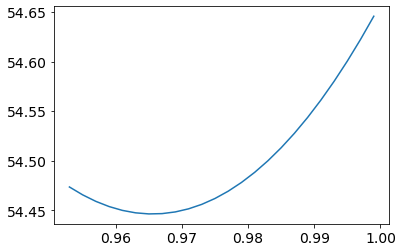

In [75]:
opteps_OLS_loop (2017, HWframe,12)[1]

### opt eps plot

In [76]:
def opteps_OLS_months2 (years, df,mnth,epsilon1,xcol = 'DT', ycol = 'Fh', eqdigits=3,):
    
    df_all = HWframe.copy()
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
        &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
   
        
        
    list_T_s = tf_T_s(df.Fld, df.Flu ) # both longwave are underestimated by 5 watt/m2
   
    df = df.assign(T_s=list_T_s)
    #list_H = (df.Fh  30)
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
   
        #####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)  # sensible heat is overestimated by 30 watt/m2
    reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
    m=float(reg.coef_)
    c= float(reg.intercept_)
    y_pred = m*x+c
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x + c \nm={0}\nc={1}\n'r'R$^2$={2}''\nRMSE={3}\nN={4}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(c,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
        
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))
    #plt.plot(df12.DT2,df12.fh,".k",label='_nolegend_')
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('Alice Spring,{0}, $\epsilon$={1}'.format(df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))))
    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    plt.xticks([-5,0,5,10,15])
    
    plt.xlim(0, 15)
    plt.ylim(0, 500)
        
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

52.35273949763934


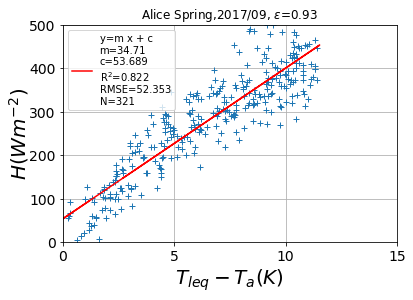

52.35273949763934


In [77]:
opteps_OLS_months2( 2017,HWframe,9,0.93)

## Yearly epsilon:

50.77767479123


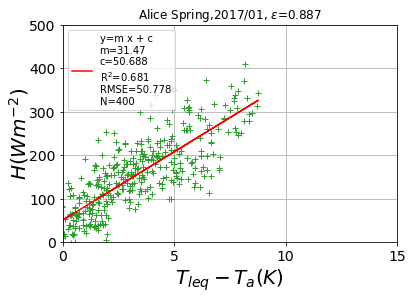

50.77767479123
42.977701382367975


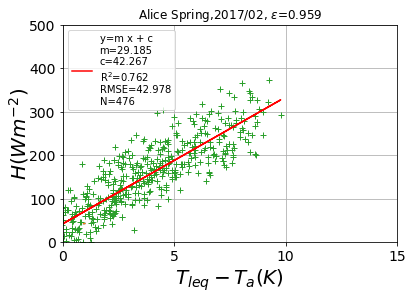

42.977701382367975
42.933570020713525


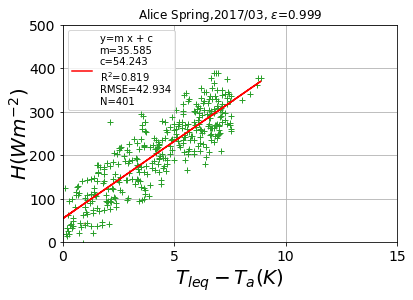

42.933570020713525


In [ ]:
yr=2017
mnth=0
list_opt_epsref1=[]
c_2017=[]
for i in range(12):
    mnth=i+1
    opteps_As_ref = pd.DataFrame(columns=["RMSE", "m","c","eps_ref","R2"])
    opt_eps = opteps_OLS_loop(yr, HWframe,mnth)[0]
    c=opteps_OLS_loop(yr, HWframe,mnth)[1]
    
    if opt_eps<1:
        list_opt_epsref1.append(opt_eps)
        c_2017.append(c)
        opteps_OLS_months2(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsref1.append(1)
    
const=np.mean(list_opt_epsref1)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsref1,color= 'orange')
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Leq$'.format(str(np.round(yr)))
fname = 'AS_le_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
from random import seed
from random import sample
from numpy.random import randint
import random

In [ ]:
c_2017

### leq with intercept using sobol:
after stans commenton the issue https://git.list.lu/wave/lst-retrival-from-fluxnet-data/-/issues/10

In [ ]:
#np.arange(1, 0.2, -0.002)

In [ ]:
## calculating optimum epsilon :

def opteps_loop_salib2 (years,df_all,mnth,unc_H,unc_Fld,unc_Flu,unc_Ta,eqdigits=3,
                       epsmin=0.4, epsmax=0.998, epsincr= -0.002):
    opteps_As_refsalib2 = pd.DataFrame(columns=["RMSE", "m","c","eps_ref","R2"])
    k=0
    RMSE_check=0
    epsilon1=np.arange(epsmax, epsmin, epsincr).tolist() # using array of the epsilon values
    
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1}
                                 ,on_unused_input='ignore')
                                                       
        

        list_H=df.Fh+unc_H
        df = df.assign(H=list_H)
        Fld=df.Fld+unc_Fld
        Flu=df.Flu+unc_Flu
        list_T_s = tf_T_s(Fld,Flu)
        
        df = df.assign(T_s=list_T_s)
        list_DT = df.T_s - (df.T_a+unc_Ta)
        df = df.assign(DT=list_DT)        
        
        x=np.array(df.DT)
        y=np.array(df.H)
        x=x.reshape(-1,1)
        y=y.reshape(-1,1) #
        reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
        m=float(reg.coef_)
        c= float(reg.intercept_)
        y_pred = m*x + c
        N=len(y)
        MSE= mean_squared_error(y,y_pred)
        RMSE=float(sqrt(MSE))
        r2=r2_score(y,y_pred)
        if r2 > 0.5:
            opteps_As_refsalib2.loc[k]=[RMSE, m,c, epsilon1[j], r2]    
        else:
            opteps_As_refsalib2.loc[k]=[np.nan, np.nan, np.nan, np.nan, r2]
              
        df_eps_refter=opteps_As_refsalib2.copy() 
        #print(df_eps_refter.eps_ref)
        if k > 1:   ## using RMSE criteria for terminating the loop
            if df_eps_refter.RMSE[k]- df_eps_refter.RMSE[k-1] > 0:
                RMSE_check=RMSE_check+1
            else:
                RMSE_check=0
        k=k+1
        if RMSE_check == 6:
            break
      
    df_eps_ref=opteps_As_refsalib2.copy()
    #print(df_eps_refter.eps_ref)
    #plt.plot(df_eps_ref.eps_ref,df_eps_ref.RMSE)
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return df_eps_ref.eps_ref.iloc[0],df_eps_ref.c.iloc[0]
        

In [ ]:
x=opteps_loop_salib2 (2017,HWframe,8,18.8476,2.2705,-3.4423,-0.8720)[1]

In [ ]:
print(x)

In [ ]:
opteps_flux_error_intr= pd.DataFrame(columns=["year", "month","unc_h","unc_fld","unc_flu",
                                         "unc_ta","eps","intercept"])
sobol_index= pd.DataFrame(columns=["Param", "S1","S1_conf","ST","ST_conf",
                                  "dhS2","dfldS2","dfluS2",
                                   "dTaS2","dhS2_conf","dfldS2_conf","dfluS2_conf","dTaS2_conf","month"])
months=(np.arange(1,13))
year=2017
jj=0
kk=0
for k in range(0,12):
    
    problem = {
           'num_vars': 4,
           'names': ['dFh', 'dFld', 'dFlu','dTa'],
           'bounds': [[-20,20], ## error range for H
               [-5,5], ## error range for Rlup
               [-5,5],
               [-1,1]      ]
        }
    param_values = saltelli.sample(problem, 100, calc_second_order=True)
    eps = np.zeros([param_values.shape[0]])
    C=np.zeros([param_values.shape[0]])
    for i in range(0,len(param_values)):
        unc_H=param_values[i,0]
        unc_Fld=param_values[i,1]
        unc_Flu=param_values[i,2]
        unc_Ta=param_values[i,3]
        eps[i]=opteps_loop_salib2(2017,HWframe,months[k],unc_H,unc_Fld,unc_Flu,unc_Ta)[0]
        C[i]=opteps_loop_salib2(2017,HWframe,months[k],unc_H,unc_Fld,unc_Flu,unc_Ta)[1]
        
        opteps_flux_error_intr.loc[jj]=[year,months[k],unc_H,unc_Fld,unc_Flu,unc_Ta,eps[i],C[i]]
        jj=jj+1
        

    
    Si = sobol.analyze(problem, eps,print_to_console=True)
    Param=['dh','dfld', 'dflu','dta']
    sobol_index.loc[0+(4*kk)]=[Param[0], Si['S1'][0],Si['S1_conf'][0],Si['ST'][0],Si['ST_conf'][0],np.nan,Si['S2'][0,1],
                              Si['S2'][0,2],Si['S2'][0,3],
                              np.nan,Si['S2_conf'][0,1],
                              Si['S2_conf'][0,2],Si['S2_conf'][0,3],months[k]]
    sobol_index.loc[1+(4*kk)]=[Param[1], Si['S1'][1],Si['S1_conf'][1],Si['ST'][1],Si['ST_conf'][1],np.nan,np.nan,Si['S2'][1,2],
                               Si['S2'][1,3],
                               np.nan,np.nan,Si['S2_conf'][1,2],Si['S2_conf'][1,3],months[k]
                              ]
    sobol_index.loc[2+(4*kk)]=[Param[2], Si['S1'][2],Si['S1_conf'][2],Si['ST'][2],Si['ST_conf'][2],np.nan,np.nan,np.nan,
                               Si['S2'][2,3],
                               np.nan,np.nan,np.nan,Si['S2_conf'][2,3],months[k]]
    sobol_index.loc[3+(4*kk)]=[Param[3], Si['S1'][3],Si['S1_conf'][3],Si['ST'][3],Si['ST_conf'][3],np.nan,np.nan,np.nan,np.nan,
                               np.nan,np.nan,np.nan,np.nan,months[k]]
    kk=kk+1
        
                               


opteps_flux_error.to_csv('/home/thakur_21505/lst-retrival-from-fluxnet-data/output/salib_AS_with_c.csv')

In [ ]:
## dataframe into csv files:
opteps_flux_error.to_csv('/home/thakur_21505/lst-retrival-from-fluxnet-data/output/salib_AS_leq_intercept.csv')

In [ ]:
plt.plot(df_2017[0].c)

In [ ]:
df_2017[0].c

In [ ]:
plt.plot(opteps_flux_error.month,opteps_flux_error.intercept,"*",label='with flux perturbation')
plt.plot(np.arange(1,13),c_2017,label='without perturbation')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Intercept $(W/m^{2})$', labelpad=10, va='center',fontsize=20)
plt.legend()
#plottitle = r'${0},Alice spring,$'.format(str(np.round(yr)))
fname = 'AS_inter_unc'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
#check for 8th month:
opteps_flux_error1= pd.DataFrame(columns=["year", "month","unc_h","unc_fld","unc_flu","unc_ta","eps"])
sobol_index= pd.DataFrame(columns=["Param", "S1","S1_conf","ST","ST_conf",
                                  "dhS2","dfldS2","dfluS2",
                                   "dTaS2","dhS2_conf","dfldS2_conf","dfluS2_conf","dTaS2_conf","month"])
#months=(np.arange(1,13))
months=9
year=2017
jj=0
kk=0
for k in range(0,1):
    
    problem = {
           'num_vars': 4,
           'names': ['dFh', 'dFld', 'dFlu','dTa'],
           'bounds': [[-20,20], ## error range for H
               [-5,5], ## error range for Rlup
               [-5,5],
               [-1,1]      ]
        }
    param_values = saltelli.sample(problem, 100, calc_second_order=True)
    eps = np.zeros([param_values.shape[0]])
    for i in range(0,len(param_values)):
        unc_H=param_values[i,0]
        unc_Fld=param_values[i,1]
        unc_Flu=param_values[i,2]
        unc_Ta=param_values[i,3]
        eps[i]=opteps_loop_salib2(2017,HWframe,months,unc_H,unc_Fld,unc_Flu,unc_Ta)[0]
        df_unc=opteps_loop_salib2(2017,HWframe,months,unc_H,unc_Fld,unc_Flu,unc_Ta)[1]
        
        
        opteps_flux_error1.loc[jj]=[year,months,unc_H,unc_Fld,unc_Flu,unc_Ta,eps[i]]
        jj=jj+1
        

In [ ]:
max(opteps_flux_error.intercept)

In [ ]:
min(opteps_flux_error.intercept)

In [ ]:
min(opteps_flux_error1.eps)

In [ ]:
#check for 10th month:
opteps_flux_error_10= pd.DataFrame(columns=["year", "month","unc_h","unc_fld","unc_flu","unc_ta","eps"])
sobol_index= pd.DataFrame(columns=["Param", "S1","S1_conf","ST","ST_conf",
                                  "dhS2","dfldS2","dfluS2",
                                   "dTaS2","dhS2_conf","dfldS2_conf","dfluS2_conf","dTaS2_conf","month"])
#months=(np.arange(1,13))
months=10
year=2017
jj=0
kk=0
for k in range(0,1):
    
    problem = {
           'num_vars': 4,
           'names': ['dFh', 'dFld', 'dFlu','dTa'],
           'bounds': [[-20,20], ## error range for H
               [-5,5], ## error range for Rlup
               [-5,5],
               [-1,1]      ]
        }
    param_values = saltelli.sample(problem, 100, calc_second_order=True)
    eps = np.zeros([param_values.shape[0]])
    for i in range(0,len(param_values)):
        unc_H=param_values[i,0]
        unc_Fld=param_values[i,1]
        unc_Flu=param_values[i,2]
        unc_Ta=param_values[i,3]
        eps[i]=opteps_loop_salib2(2017,HWframe,months,unc_H,unc_Fld,unc_Flu,unc_Ta)
        #print(eps[i])
        
        opteps_flux_error_10.loc[jj]=[year,months,unc_H,unc_Fld,unc_Flu,unc_Ta,eps[i]]
        jj=jj+1
        

In [ ]:
min(opteps_flux_error_10.eps)

In [ ]:
#check for 11th month:
opteps_flux_error_11= pd.DataFrame(columns=["year", "month","unc_h","unc_fld","unc_flu","unc_ta","eps"])
sobol_index= pd.DataFrame(columns=["Param", "S1","S1_conf","ST","ST_conf",
                                  "dhS2","dfldS2","dfluS2",
                                   "dTaS2","dhS2_conf","dfldS2_conf","dfluS2_conf","dTaS2_conf","month"])
#months=(np.arange(1,13))
months=11
year=2017
jj=0
kk=0
for k in range(0,1):
    
    problem = {
           'num_vars': 4,
           'names': ['dFh', 'dFld', 'dFlu','dTa'],
           'bounds': [[-20,20], ## error range for H
               [-5,5], ## error range for Rlup
               [-5,5],
               [-1,1]      ]
        }
    param_values = saltelli.sample(problem, 100, calc_second_order=True)
    eps = np.zeros([param_values.shape[0]])
    for i in range(0,len(param_values)):
        unc_H=param_values[i,0]
        unc_Fld=param_values[i,1]
        unc_Flu=param_values[i,2]
        unc_Ta=param_values[i,3]
        eps[i]=opteps_loop_salib2(2017,HWframe,months,unc_H,unc_Fld,unc_Flu,unc_Ta)[0]
        df_unc_11=opteps_loop_salib2(2017,HWframe,months,unc_H,unc_Fld,unc_Flu,unc_Ta)[1]
        #print(eps[i])
        
        opteps_flux_error_11.loc[jj]=[year,months,unc_H,unc_Fld,unc_Flu,unc_Ta,eps[i]]
        jj=jj+1
        

In [ ]:
plt.plot(df_unc_11.c)

In [ ]:
plot.plot(df_unc_11.)

In [ ]:
opteps_flux_error_11

In [ ]:
opteps_flux_error_11.eps.min()

In [ ]:
min(opteps_flux_error_10.eps)

In [ ]:
min(opteps_flux_error.eps)

## without intercept

In [ ]:
## yr=2017
mnth=0
list_opt_epsref1=[]
for i in range(1):
    mnth=9
    #opteps_As_ref = pd.DataFrame(columns=["RMSE", "m","c","eps_ref","R2"])
    opt_eps = opteps_OLS_loop(yr, HWframe,mnth)[0]
    df_mnth=opteps_OLS_loop(yr, HWframe,mnth)[1]
    print(opt_eps)
    
    if opt_eps<1:
        list_opt_epsref1.append(opt_eps)
        opteps_OLS_months2(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsref1.append(1)
    
const=np.mean(list_opt_epsref1)


In [ ]:
df_unc.c

In [ ]:
box=plt.boxplot([con_month[0],con_month[1],con_month[2],con_month[3],con_month[4],con_month[5],
             con_month[6],con_month[7],con_month[8],con_month[9],con_month[10],con_month[11]],1,patch_artist=True,
               positions=np.arange(0.75,12.75))


box1=plt.boxplot([ign_month[0],ign_month[1],ign_month[2],ign_month[3],ign_month[4],ign_month[5],
             ign_month[6],ign_month[7],ign_month[8],ign_month[9],ign_month[10],ign_month[11]],1,patch_artist=True,
                 positions=np.arange(1.25,13.25))
plt.setp(box1["boxes"], facecolor='orange')
plt.setp(box["boxes"], facecolor='blue')
plt.xticks(np.arange(1,13), ('0','1','2','3','4','5','6','7','8','9','10','11','12'))
plt.ylabel('Temperature (K)', ha='center',fontsize=20)
plt.xlabel('Month', labelpad=10, va='center',fontsize=20)
plt.legend([box["boxes"][0],box1["boxes"][0]],["TS", "TS1"],loc="upper left")         
plt.title('{0}, $\epsilon1$={1},$\epsilon2$={2}'.format(df.index[0].date().strftime('%Y'), 
                                               str(np.round(epsilon1,decimals=3)),
                                                str(np.round(epsilon2,decimals=3))))
plt.grid()
plt.show()


In [ ]:
box=plt.boxplot([df_mnth.c,df_unc.c],positions=np.arange(0,2))
plt.xticks(np.arange(0,2), ('no unc','with unc'))
plt.ylabel('Intercept $(W/m^{2})$', labelpad=10, va='center',fontsize=20)
plt.show()
#box1=plt.boxplot([df_unc.c])
#plt.setp(box1["boxes"], facecolor='orange')
#plt.setp(box["boxes"], facecolor='blue')
#plt.show()

In [ ]:
plt.plot(df_mnth.c,"*",color= 'blue')
plt.plot(df_unc.c, ".",color= 'orange')
plt.xticks(rotation=45)
#plt.xlabel('Year', ha='center',fontsize=20)
plt.ylabel('Intercept $(W/m^{2})$', labelpad=10, va='center',fontsize=20)
plt.legend(['no unc','with unc'])

In [ ]:
#check for 5th month:
opteps_flux_error_5= pd.DataFrame(columns=["year", "month","unc_h","unc_fld","unc_flu","unc_ta","eps"])
sobol_index= pd.DataFrame(columns=["Param", "S1","S1_conf","ST","ST_conf",
                                  "dhS2","dfldS2","dfluS2",
                                   "dTaS2","dhS2_conf","dfldS2_conf","dfluS2_conf","dTaS2_conf","month"])
#months=(np.arange(1,13))
months=5
year=2017
jj=0
kk=0
for k in range(0,1):
    
    problem = {
           'num_vars': 4,
           'names': ['dFh', 'dFld', 'dFlu','dTa'],
           'bounds': [[-20,20], ## error range for H
               [-5,5], ## error range for Rlup
               [-5,5],
               [-1,1]      ]
        }
    param_values = saltelli.sample(problem, 100, calc_second_order=True)
    eps = np.zeros([param_values.shape[0]])
    for i in range(0,len(param_values)):
        unc_H=param_values[i,0]
        unc_Fld=param_values[i,1]
        unc_Flu=param_values[i,2]
        unc_Ta=param_values[i,3]
        eps[i]=opteps_loop_salib2(2017,HWframe,months,unc_H,unc_Fld,unc_Flu,unc_Ta)
        #print(eps[i])
        
        opteps_flux_error_5.loc[jj]=[year,months,unc_H,unc_Fld,unc_Flu,unc_Ta,eps[i]]
        jj=jj+1
        

In [ ]:
opteps_flux_error_5.eps.min()

In [ ]:
x=opteps_flux_error.eps[9000:10000]
print(max(x))
print(min(x))

In [ ]:
opteps_flux_error.eps[6000:7000]
#x=opteps_flux_error.month[9000:10000]
#print(min(x))


In [ ]:
opteps_flux_error.eps[11000:12000]

In [ ]:
opteps_flux_error1

In [ ]:
opteps_flux_error.to_csv('/home/thakur_21505/lst-retrival-from-fluxnet-data/output/salib_AS_leq_inter.csv')

### epsilon ucertainity for 1 year:

In [ ]:
df=opteps_flux_error.copy()
max_eps=[]
min_eps=[]
mean_eps=[]
for i in np.arange(1,13):
    df_plot=df[(df.month == i)]
    max_eps.append(max(df_plot.eps))
    min_eps.append(min(df_plot.eps))
    mean_eps.append(df_plot.eps.mean())
fig=plt.figure(figsize=(12,8))   
plt.plot(np.arange(1,13),list_opt_epsref1, color='red')
plt.plot(np.arange(1,13),max_eps, color='green')
plt.plot(np.arange(1,13), min_eps, color='blue')
plt.plot(np.arange(1,13), mean_eps,'*', color='k')
plt.legend(['opt epsilon','maximum epsilon', 'minimum epsilon', 'mean epsilon'])
plt.xticks(np.arange(1,13))
plt.xlabel(r'$Months$', ha='center',fontsize=20)
plt.ylabel(r'$\epsilon$', ha='center',fontsize=20)
#plt.title('$\epsilon$={0}'.format(np.round(epsilon1,decimals=2)))
plottitle = 'Alice spring uncertainity in emissivity using complete equation for year 2017'
fname = 'as_salib{0}'.format(str(np.round(2017)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
#plt.grid()

    
    


## sensivity indices:

In [ ]:
import json

### opts eps 3years:

## opt eps: Ignoring reflected

In [ ]:
opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
def opteps_OLS_loop_1 (years, df_all,mnth,xcol = 'DT1', ycol = 'Fh',
                       epsmin=0.7, epsmax=0.999, epsincr=0.002, eqdigits=3):
    
    
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    for j in range(len(epsilon1)) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
        tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        list_T_s1 = tf_T_s1(df.Flu +5)
        df = df.assign(T_s1=list_T_s1)
        ##########
        #list_T_s12 = tf_T_s12(df12.Flu)
        #df12 = df12.assign(T_s12=list_T_s12)
       # list_H = df.Fh
        list_DT1 = df.T_s1 - df.T_a
        df = df.assign(DT1=(df.T_s1 - df.T_a))
        
        ###########
        df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
        xdata1 = df1[xcol]
        ydata1 = df1[ycol]
        x=np.array(xdata1)
        y=np.array(ydata1)
        x=x.reshape(-1,1)
        y=(y.reshape(-1,1)-30)
        reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        m=float(reg.coef_)
        y_pred = m*x
        N=len(y)
        MSE= mean_squared_error(y,y_pred)
        RMSE=float(sqrt(MSE))
        r2=r2_score(y,y_pred)
        if r2 > 0.5:
                 opteps_As.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_As.loc[k]=[np.nan, np.nan, 1, r2]   
            
        k=k+1
        
    
    df_eps= opteps_As.copy()
    
    df_eps.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return df_eps.eps.iloc[0]
        
       

In [ ]:
opteps_OLS_loop_1 (2016,HWframe,6)

In [ ]:
def opteps_OLS_months (years, df_all,mnth,epsilon1,xcol = 'DT1', ycol = 'Fh' , eqdigits=3):
    """Plot a panel per month with H and delT."""
    
    
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)&(df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
    tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
    list_T_s1 = tf_T_s1(df.Flu+5)
    df = df.assign(T_s1=list_T_s1)
        ##########
    list_T_s12 = tf_T_s12(df12.Flu)
    df12 = df12.assign(T_s12=list_T_s12)
    list_H = df.Fh
    list_DT1 = df.T_s1 - df.T_a
    df = df.assign(DT1=(df.T_s1 - df.T_a))
    list_DT12 = df12.T_s12 - df12.T_a
    df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=(y.reshape(-1,1)-30)
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
       
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))#.format(list_months))
    
    plt.xlabel(r'$T_{seq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H(W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('Alice Spring,{0}, $\epsilon$={1}'.format(df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))))
        
    
        
    plt.xticks([-5,0,5,10,15])
    plt.xlim(0, 15)
    plt.ylim(0, 500)
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
        
        

In [ ]:
opteps_OLS_months( 2016,HWframe,6,0.970)

In [ ]:
opteps_OLS_months( 2016,HWframe,6,0.974)

In [ ]:
yr=2016
mnth=0
list_opt_epsign=[]
for i in range(12):
    #opt_eps_RMSE_brook = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    mnth=i+1
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    opt_eps=  opteps_OLS_loop_1(yr, HWframe,mnth)
    
    if opt_eps<1:
        list_opt_epsign.append(opt_eps)
        opteps_OLS_months(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsign.append(1)
    
const=np.mean(list_opt_epsign)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsign,color= 'orange')
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.text(8,0.975, "avg eps =" + str(np.round(const,decimals=eqdigits)))    

plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Seq$(H-30,LW+5)'.format(str(np.round(yr)))
fname = 'AS_se_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
yr=2017
mnth=0
list_opt_epsign1=[]
for i in range(12):
    #opt_eps_RMSE_brook = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    mnth=i+1
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    opt_eps=  opteps_OLS_loop_1(yr, HWframe,mnth)
    
    if opt_eps<1:
        list_opt_epsign1.append(opt_eps)
        opteps_OLS_months(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsign1.append(1)
    
const=np.mean(list_opt_epsign1)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsign1,color= 'orange')
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.text(8,0.975, "avg eps =" + str(np.round(const,decimals=eqdigits)))    

plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Seq$,(H-30,LW+5)'.format(str(np.round(yr)))
fname = 'AS_se_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
yr=2018
mnth=0
list_opt_epsign2=[]
for i in range(12):
    #opt_eps_RMSE_brook = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    mnth=i+1
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    opt_eps=  opteps_OLS_loop_1(yr, HWframe,mnth)
    
    if opt_eps<1:
        list_opt_epsign2.append(opt_eps)
        opteps_OLS_months(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsign2.append(1)
    
const=np.mean(list_opt_epsign2)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],list_opt_epsign2,color= 'orange')
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.2,ls='dotted')
plt.text(8,0.975, "avg eps =" + str(np.round(const,decimals=eqdigits)))    

plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'${0},Alice spring,Seq(H-30,LW +5)$'.format(str(np.round(yr)))
fname = 'AS_se_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
opteps_ign_2016=list_opt_epsign.copy()
opteps_ign_2017=list_opt_epsign1.copy()
opteps_ign_2018=list_opt_epsign2.copy()
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],opteps_ign_2016,color= 'orange', label='2016')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],opteps_ign_2017,color= 'red',label='2017')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],opteps_ign_2018,color= 'blue',label='2018')

plt.xlabel('Month', ha='center',fontsize=20)

plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plt.legend(['2016','2017','2018'])
plottitle = r'Alice Spring,$Seq$'
fname = 'AS_seq_{0}'.format(str(np.round(yr)))
plt.title(plottitle)
plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
